In [ ]:
import pandas as pd
import missingno as msno

In [ ]:
df = pd.read_excel('Datos/Originales/información_prestamos.xlsx')

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [ ]:
df.dtypes


ID                       object
Edad                      int64
Ingresos                  int64
Monto_Inicial             int64
Scoring_Crediticio        int64
Meses_Empleo              int64
Num_Creditos              int64
Ratio_Interes           float64
Duracion                  int64
Ratio_Deuda_Ingresos    float64
Estudios                 object
Tipo_Jornada_Laboral     object
Estado_Civil             object
Posesion_Hipoteca         int64
Personas_Cargo            int64
Proposito                object
Fiador                    int64
Impago                    int64
Prima                   float64
dtype: object

<Axes: >

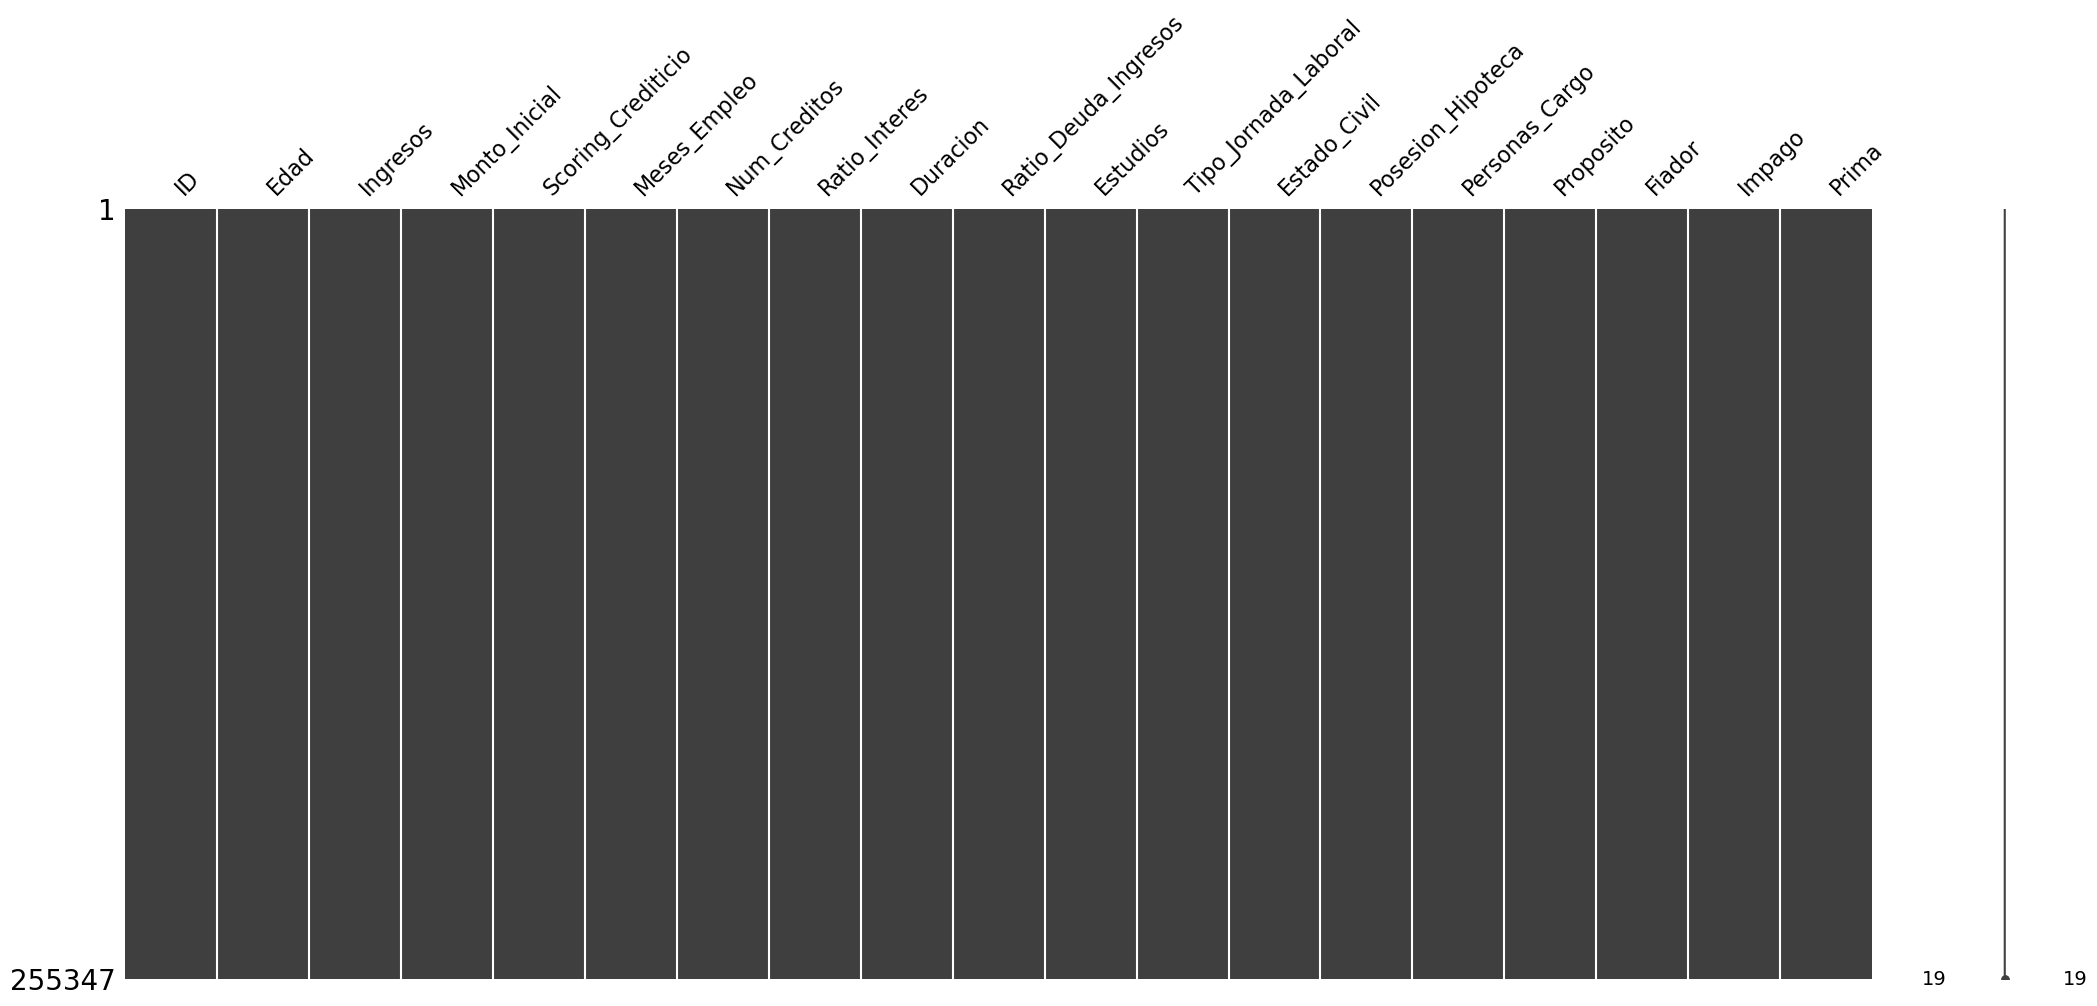

In [ ]:
msno.matrix(df)

In [ ]:
df.head()

,ID,Edad,Ingresos,Monto_Inicial,Scoring_Crediticio,Meses_Empleo,Num_Creditos,Ratio_Interes,Duracion,Ratio_Deuda_Ingresos,Estudios,Tipo_Jornada_Laboral,Estado_Civil,Posesion_Hipoteca,Personas_Cargo,Proposito,Fiador,Impago,Prima
0,S97R7X,18,61628,83011,397,113,1,8.06,48,0.45,Doctorado,Autónomo,Casado,1,0,Automóvil,0,0,155.80
1,T3ZE0N,69,19485,25474,784,46,2,15.04,48,0.15,Grado Universitario,Tiempo parcial,Soltero,0,1,Educación,0,0,24.20
2,RLGTBY,50,82410,68642,486,14,3,21.96,12,0.71,Escolar,Tiempo parcial,Divorciado,1,0,Automóvil,1,1,58.33
3,BZ86CV,64,132974,208339,308,10,1,24.26,12,0.61,Máster,Desempleado,Casado,1,0,Negocios,1,0,284.46
4,5OD75M,62,51411,113847,412,47,2,5.73,36,0.70,Grado Universitario,Autónomo,Casado,0,0,Negocios,0,0,101.77


In [ ]:
df["Estudios"].unique()
df["Proposito"].unique()

array(['Automóvil', 'Educación', 'Negocios', 'Vivienda', 'Otros'],
      dtype=object)

In [ ]:
df_auto=df[df["Proposito"]=="Automóvil"]

In [ ]:
df_auto.describe()  #minimo de 18 años #meses de empleo 0???? 

,Edad,Ingresos,Monto_Inicial,Scoring_Crediticio,Meses_Empleo,Num_Creditos,Ratio_Interes,Duracion,Ratio_Deuda_Ingresos,Posesion_Hipoteca,Personas_Cargo,Fiador,Impago,Prima
count,50844.000000,50844.000000,50844.000000,50844.000000,50844.000000,50844.000000,50844.000000,50844.000000,50844.00000,50844.000000,50844.000000,50844.000000,50844.000000,50844.000000
mean,43.546515,82508.299504,127857.908721,574.575918,59.651090,2.496204,13.467197,36.004248,0.50122,0.503344,0.500865,0.503186,0.118814,133.959505
std,15.039088,38985.377101,70789.034786,159.133466,34.759381,1.119726,6.634673,17.003908,0.23109,0.499994,0.500004,0.499995,0.323573,86.805912
min,18.000000,15016.000000,5020.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.10000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,31.000000,48702.750000,66268.750000,437.000000,30.000000,1.000000,7.740000,24.000000,0.30000,0.000000,0.000000,0.000000,0.000000,63.207500
50%,43.000000,82639.000000,128401.500000,573.000000,60.000000,2.000000,13.420000,36.000000,0.50000,1.000000,1.000000,1.000000,0.000000,122.400000
75%,57.000000,116094.750000,189338.000000,713.000000,90.000000,4.000000,19.230000,48.000000,0.70000,1.000000,1.000000,1.000000,0.000000,187.742500
max,69.000000,149996.000000,249988.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.90000,1.000000,1.000000,1.000000,1.000000,726.330000


In [ ]:
#df_auto["Ratio_Interes"] = df_auto["Ratio_Interes"] / 100 #pasar a %



In [ ]:
df_auto=pd.get_dummies(df_auto,columns=["Proposito","Estudios","Tipo_Jornada_Laboral","Estado_Civil"])
df_auto.head()

,ID,Edad,Ingresos,Monto_Inicial,Scoring_Crediticio,Meses_Empleo,Num_Creditos,Ratio_Interes,Duracion,Ratio_Deuda_Ingresos,...,Estudios_Escolar,Estudios_Grado Universitario,Estudios_Máster,Tipo_Jornada_Laboral_Autónomo,Tipo_Jornada_Laboral_Desempleado,Tipo_Jornada_Laboral_Jornada completa,Tipo_Jornada_Laboral_Tiempo parcial,Estado_Civil_Casado,Estado_Civil_Divorciado,Estado_Civil_Soltero
0,S97R7X,18,61628,83011,397,113,1,8.06,48,0.45,...,False,False,False,True,False,False,False,True,False,False
2,RLGTBY,50,82410,68642,486,14,3,21.96,12,0.71,...,True,False,False,False,False,False,True,False,True,False
8,SKE2P9,37,110810,101859,765,115,3,11.20,60,0.40,...,False,True,False,False,False,False,True,False,True,False
9,E2FB1D,56,16815,157551,643,108,1,21.24,24,0.72,...,False,False,True,True,False,False,False,False,False,True
13,TKSCGH,35,42315,180635,645,114,3,16.95,12,0.50,...,False,True,False,False,False,True,False,True,False,False


In [ ]:
df_auto.to_csv("Datos/Transformados/df_limpio.csv",index=False)

NameError: name 'df_auto' is not defined